In [3]:

import mnist
import os
import numpy as np

mnist.temporary_dir = lambda: os.getcwd()

# Each of these functions first downloads the data and returns a numpy array.
train_images = mnist.train_images()

assert train_images.shape == (60000, 28, 28), 'train_imgages shape is not correct'

In [4]:
a = np.array([[1,2,3,4], [4,5,6,4], [7,8,9,4], [10, 11, 12, 13]])
b = np.array([[1,2,3,4], [4,5,6,3]])

a_minus_bs = np.array([a-b[i, :] for i in range(b.shape[0])])
norms = np.linalg.norm(a_minus_bs, axis=2).T
idx = np.argmin(norms, axis=1).reshape(a.shape[0], 1)


print(a_minus_bs)
print(norms)
print(idx)

[[[ 0  0  0  0]
  [ 3  3  3  0]
  [ 6  6  6  0]
  [ 9  9  9  9]]

 [[-3 -3 -3  1]
  [ 0  0  0  1]
  [ 3  3  3  1]
  [ 6  6  6 10]]]
[[ 0.          5.29150262]
 [ 5.19615242  1.        ]
 [10.39230485  5.29150262]
 [18.         14.4222051 ]]
[[0]
 [1]
 [1]
 [1]]


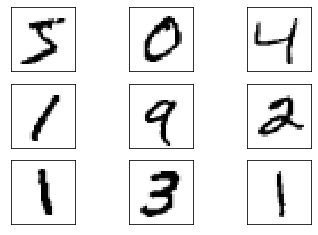

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(train_images[3 * i + j], cmap='Greys')
        ax[i][j].xaxis.set_visible(False)
        ax[i][j].yaxis.set_visible(False)

In [6]:
train_images_reshaped = train_images.reshape((train_images.shape[0], 28*28))
print(f'Train images before reshape: {train_images.shape}')
print(f'Train images after  reshape: {train_images_reshaped.shape}')

assert all(train_images[0, 20] == train_images_reshaped[0, (20)*28:(20+1)*28]), "train reshaping is wrong"

Train images before reshape: (60000, 28, 28)
Train images after  reshape: (60000, 784)


In [7]:
def initialize_centroids(X, K):
    return X[np.random.choice(X.shape[0], K, replace=False), :]


def find_closest_centroids(X, centroids):
    print('find_closest_centroids_started')
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0])
    
    for n in range(X.shape[0]):
        min_distance = np.inf
        j = 0
        for m in range(K):
            
            norm = np.linalg.norm(centroids[m, :]-X[n, :])
            #print(m, n, norm)
            if norm < min_distance:
                min_distance = norm
                j = m
        idx[n] = j
    print('find_closest_centroids_finished')
    return idx


def find_closest_centroids_numpyed(X, centroids): #maybe faster! but is not memory friendly
    K = centroids.shape[0]

    X_minus_Cs = np.array([X-centroids[i, :] for i in range(K)])
    norms = np.linalg.norm(X_minus_Cs, axis=2).T
    idx = np.argmin(norms, axis=1)
    print('find_closest_centroids_numpyed_finished')
    return idx


def compute_centroids(X, idx, K, prev_centroids):
    centroids = np.copy(prev_centroids)
    
    for i in np.unique(idx).astype(int):
        centroids[i, :] = np.mean(X[idx.astype(int) == i, :], axis=0)
    return centroids


def show_centroids(centroids, K):
    fig, ax = plt.subplots(K//5, 5)
    for i in range(K//5):
        for j in range(5):
            ax[i][j].imshow(centroids[5 * i + j].reshape(28, 28), cmap='Greys')
            ax[i][j].xaxis.set_visible(False)
            ax[i][j].yaxis.set_visible(False)
    plt.show()

    
def distortion(final_centroids, final_idx):
    J = 0
    
    for i in np.unique(final_idx).astype(int):
        X_desired = X[final_idx.astype(int) == i, :]
        X_desired = X_desired-final_centroids[i, :]
        J += np.mean(X_desired**2)
    return J


def kmeans_algorithm(X, initial_centroids, K):
    prev_centroids = initial_centroids
    
    for i in range(20):
        idx = find_closest_centroids(X, prev_centroids)
        new_centroids = compute_centroids(X, idx, K, prev_centroids)
        
        centroids_change_metric = np.linalg.norm(new_centroids - prev_centroids)
        #print(f'centroids got changed as {centroids_change_metric}.')
        if centroids_change_metric < 0.01:
            print(f'K-Means algorithm converged on {i}(th) iteration.')
            break
        prev_centroids = new_centroids
        print('------------------------------------------')
    return new_centroids, idx
    
    
def kmeans_algorithm_with_distortion(X, max_iters, K):
    lowest_J = np.inf
    new_centroids = np.zeros((K, X.shape[1]))
    new_idx = np.zeros(X.shape[0])
    
    for i in range(max_iters):
        print(f'iteration {i+1} of {max_iters} is going on...')
        new_initial_centroids = initialize_centroids(X, K)
        new_centroids, new_idx = kmeans_algorithm(X, new_initial_centroids, K)
        new_J = distortion(new_centroids, new_idx)
        print(f'New J: {new_J}')
        if new_J < lowest_J:
            lowest_J = new_J
            final_centroids = new_centroids
            final_idx = new_idx
            
    return final_centroids, final_idx
            

In [8]:
K = 10
max_iters = 2

X = train_images_reshaped[np.random.choice(train_images_reshaped.shape[0], 60000, replace=False), :]/255
#X = train_images_reshaped/255

print(X.shape)

(60000, 784)


In [9]:
final_centroids, final_idx = kmeans_algorithm_with_distortion(X, max_iters, K)

iteration 1 of 2 is going on...
find_closest_centroids_started
find_closest_centroids_finished
------------------------------------------
find_closest_centroids_started
find_closest_centroids_finished
------------------------------------------
find_closest_centroids_started
find_closest_centroids_finished
------------------------------------------
find_closest_centroids_started
find_closest_centroids_finished
------------------------------------------
find_closest_centroids_started
find_closest_centroids_finished
------------------------------------------
find_closest_centroids_started
find_closest_centroids_finished
------------------------------------------
find_closest_centroids_started
find_closest_centroids_finished
------------------------------------------
find_closest_centroids_started
find_closest_centroids_finished
------------------------------------------
find_closest_centroids_started
find_closest_centroids_finished
------------------------------------------
find_closest_c

In [10]:
#print(final_idx)

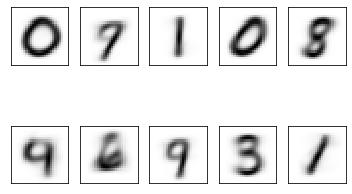

In [11]:
show_centroids(final_centroids, K)

In [12]:
for i in np.unique(final_idx).astype(int):
        print(f'number of input in idx={i} cluster: ', X[final_idx.astype(int) == i, :].shape[0])

number of input in idx=0 cluster:  2989
number of input in idx=1 cluster:  6740
number of input in idx=2 cluster:  5588
number of input in idx=3 cluster:  3175
number of input in idx=4 cluster:  6659
number of input in idx=5 cluster:  5001
number of input in idx=6 cluster:  9079
number of input in idx=7 cluster:  7143
number of input in idx=8 cluster:  7983
number of input in idx=9 cluster:  5643
